# Think-pair: Software Testing

Spend 10 minutes working through this notebook on your own, and 5 minutes discussing your answers in a breakout room with a partner. If you finish early, you can start writing tests for your own package.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class CompareFitter(object):
  """
  Given timeseries data, computes the sum of squared residuals of a linear fit 
  and a quadratic fit, selects the better fit, and plots it.

  Args:
    time (np.array of float): 1D array of times
    data (np.array of float): 1D array of corresponding data points
  """

  def __init__(self, time, data):
    self.time = time
    self.data = data
    self.n_points = len(data)

    assert len(self.time) == self.n_points, "time and data must have same length!"

  def fit_line(self):
    """
    Fits a line to the timeseries and computes the sum of squared residuals of 
    the fit.
    """
    
    self.lin_coeffs, self.linear_resids, _, _, _ = np.polyfit(
        self.time, self.data, 1, full=True
    )

  def fit_quadratic(self):
    """
    Fits a quadratic function to the timeseries and computes the sum of squared 
    residuals of the fit.
    """

    self.quad_coeffs, self.quadratic_resids, _, _, _ = np.polyfit(
        self.time, self.data, 2, full=True
    )

  def plot_best(self):
    """
    Plots the model with minimum sum of squared residuals.
    """

    fig, ax = plt.subplots(figsize=(5,5))
    ax.scatter(self.time, self.data, color='purple')
    ax.set_xlabel('time'); ax.set_ylabel('data')

    if self.linear_resids <= self.quadratic_resids:
      p = np.poly1d(self.lin_coeffs)
      ax.plot(self.time, p(self.time), color='k')
    else:
      p = np.poly1d(self.quad_coeffs)
      ax.plot(self.time, p(self.time), color='k')

    return fig, ax

How would a user interact with this code? Write down two or more ways. 

- just fitting a line or just fitting a quadratic function
- doing the full comparison and plotting the best fit

What are some edge cases? Write down two or more edge cases.

- zero data points (array of length 0)
- one data point
- all data points are zero
- data points perfectly define a vertical line (undefined slope)
- many more!




Error caught as expected!


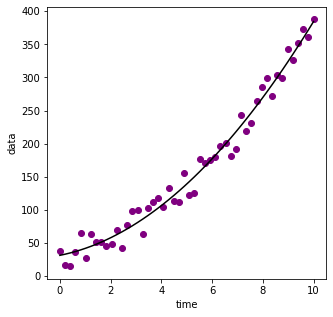

In [ ]:
import pytest

def test_fit_line():
  """
  Tests the least squares fit behavior of CompareFitter.fit_line().
  Checks the fitted values of m and b, as well as the residuals,
  for a perfectly linear dataset.

  """
  
  # step 1: make a timeseries to test on.
  m = 5
  b = 10

  times = np.linspace(0, 10, num=50)
  data = m * times + b

  # step 2: instantiate the CompareFitter class.
  myFitter = CompareFitter(times, data)

  # step 3: run CompareFitter.fit_line() and compare to your expectation.
  # (use Python's assert functionality).
  myFitter.fit_line()
  fitted_m = myFitter.lin_coeffs[0]
  fitted_b = myFitter.lin_coeffs[1]

  linear_resids = myFitter.linear_resids

  assert fitted_b == pytest.approx(b)
  assert fitted_m == pytest.approx(m)
  assert myFitter.linear_resids == pytest.approx(0)

def test_fit_line_empty_array():
  """
  Tests the behavior of CompareFitter.fit_line() for empty input arrays.
  Expects a TypeError returned by numpy.polyfit.

  (I included this particular test on purpose to demonstrate how
  you might go about testing the error checking behavior of a code, although
  many of you probably opted to test fit_quadratic() here.)
  """
  empty_times = np.array([])
  empty_data = np.array([])

  myEmptyDataFitter = CompareFitter(empty_times, empty_data)

  # catch only one particular type of error
  try:
    myEmptyDataFitter.fit_line()
  except TypeError:
    print('Error caught as expected!')

def test_plot_best():
  """
  Tests the overall behavior of CompareFitter.plot_best() for noisy
  quadratic data.

  Note that this test requires manual inspection of results.
  """

  # define data parameters
  a1 = 5
  a2 = 3
  b = 10
  err = 50
  arr_length = 50

  # generate noisy data
  times = np.linspace(0, 10, num=arr_length)
  noiseless_data = a2 * times**2 + a1 * times + b
  noisy_data = noiseless_data + np.random.uniform(high=err, size=arr_length)

  # run our code as a user would
  myFitter = CompareFitter(times, noisy_data)
  myFitter.fit_line()
  myFitter.fit_quadratic()
  myFitter.plot_best()

test_fit_line()
test_fit_line_empty_array()
test_plot_best()

Optional: How would you improve the original code? Implement your improvements.

Hint: how might users "break" the code? How could you design it to decrease the probability of breakage?


Many potential improvements. A few worth noting:
- It would be good to add a descriptive error message for the empty array edge case, rather than letting `numpy.polyfit` catch it.
- Right now, the code breaks if you don't run `fit_line()` and `fit_quadratic()` before `plot_best()`. Would be good to fix this (or at least document it!)
- If we're running this many times (for example as part of a different script), we may not want a plot every time. Would be good to add a keyword that toggles plotting on and off, or better yet to separate out the plotting and numerical comparison functionality into separate methods.
